<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2022 ex. 1 example answers  </center></h1>

In [32]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

### General note
<font color= green>
    
- In this exercise, as in the exercises of this course in general there is not necessarily one right answer or one way of doing them properly. Critical thinking and deliberation in written answers is appreciated. Even if a answer would be a bit wrong, if it is argumented for points may have been awarded. The question of WHY you do things is more important here than HOW.

- This also means, that the code presented here is not necessarily the best possible and some answers had even nicer ways and nicer plots than those here. These example answers try to be simple in terms of code to avoid confusion. Also, the written answers try to simplify things and highlight intuition more than mathematics.  

-----------
#### ***Reading data***


In [33]:
# --- READ IN DATA (no need to change) --------
data_path = "/content/CardioCare_ex1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'body_mass':'int', 'blood_pressure_low':'int', 'blood_pressure_high':'int', 'gender': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'serum_lipid_level':'category', 'family_history':'boolean'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run.

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_Saving the feature names to a list or lists and using them to subset prevents typing errors and avoids repetition!_

In [34]:
# --- Your code here for 1a) ---
numeric_features = ['age', 'body_mass', 'height', 'blood_pressure_high', 'blood_pressure_low']
binary_features = ['gender', 'smoke', 'active', 'cardio', 'family_history']
categorical_features = ['serum_lipid_level']

data.head(5)

,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,serum_lipid_level,family_history
0,19797,False,161,55,102,68,False,True,False,elevated,False
1,22571,True,178,68,120,70,False,False,False,normal,False
2,16621,True,169,69,120,80,False,True,False,normal,False
3,16688,False,156,77,120,80,False,True,False,normal,False
4,19498,True,170,98,130,80,True,True,True,elevated,False


_________
## <font color = dimgrey> 2. Checking data quality
    
    This exercise turned out different based on your pandas version. If yours looks different its ok.

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [35]:
# --- 2a) Print the feature types of your dataset --- #
data.dtypes

age                       int64
gender                  boolean
height                    int64
body_mass                 int64
blood_pressure_high       int64
blood_pressure_low        int64
smoke                   boolean
active                  boolean
cardio                  boolean
serum_lipid_level      category
family_history          boolean
dtype: object

In [36]:
data.select_dtypes

<bound method DataFrame.select_dtypes of        age  gender  height  body_mass  blood_pressure_high  \
0    19797   False     161         55                  102   
1    22571    True     178         68                  120   
2    16621    True     169         69                  120   
3    16688   False     156         77                  120   
4    19498    True     170         98                  130   
..     ...     ...     ...        ...                  ...   
205  16630   False     158         55                  120   
206  16742   False     170         68                  110   
207  23117   False     157         78                  100   
208  15236   False     153         55                  120   
209  18043    True     172         78                  140   

     blood_pressure_low  smoke  active  cardio serum_lipid_level  \
0                    68  False    True   False          elevated   
1                    70  False   False   False            normal   
2         

--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [37]:
# --- Your code for 2b) --- #
data.describe()

,age,height,body_mass,blood_pressure_high,blood_pressure_low
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened?

**<font color = green > On answers for 2c) and 2e) </font>**

- By default the method has been developed to show only the numeric feature descriptives. This is because all of them cant be shown in the same matrix because some of the descriptive statistics dont make sense for some features.
- A passable answer for this question mentioned for example that some statistics given don't make sense.
- Very good answers took a broader perspective; the lesson in this subexercise is that you need to carefully define your data types as how packages function may depend on this. Down the line it may affect your analysis so that the results are wrong and in the worst case you might not be aware of it. For example, if you use describe to get mean values and do some mean based test you would also incorporate features where the mean as a statistic does not really make sense.

----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [38]:
# 2d) Your code here #
data[binary_features + categorical_features].describe()

,gender,smoke,active,cardio,family_history,serum_lipid_level
count,210,210,210,210,210,210
unique,2,2,2,2,2,4
top,False,False,True,False,False,normal
freq,129,186,162,105,128,153


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv.

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives.

In [39]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()

,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,family_history
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000,0.390476
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195,0.489023
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000,0.000000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000,1.000000


**2 e)** Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types?

----- add answer here ----

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)***

Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


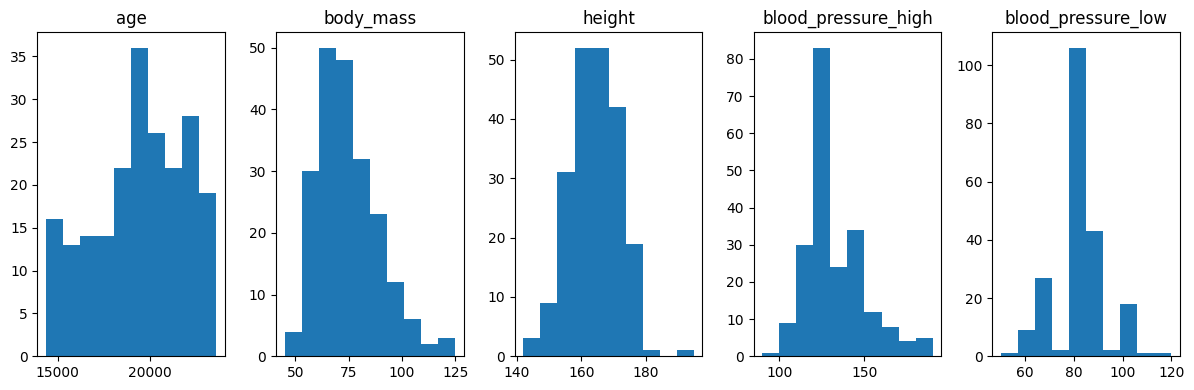

In [40]:
# --- Your code for 3a) here --- #

# Take the numeric features and plot histograms for each of them to subplots using matplotlib.
fig, axes = plt.subplots(1, 5, figsize = (12,4))
for i, fname in enumerate(numeric_features):
    axes[i].hist(data.loc[:, fname])
    axes[i].set_title(fname)
plt.tight_layout()

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._

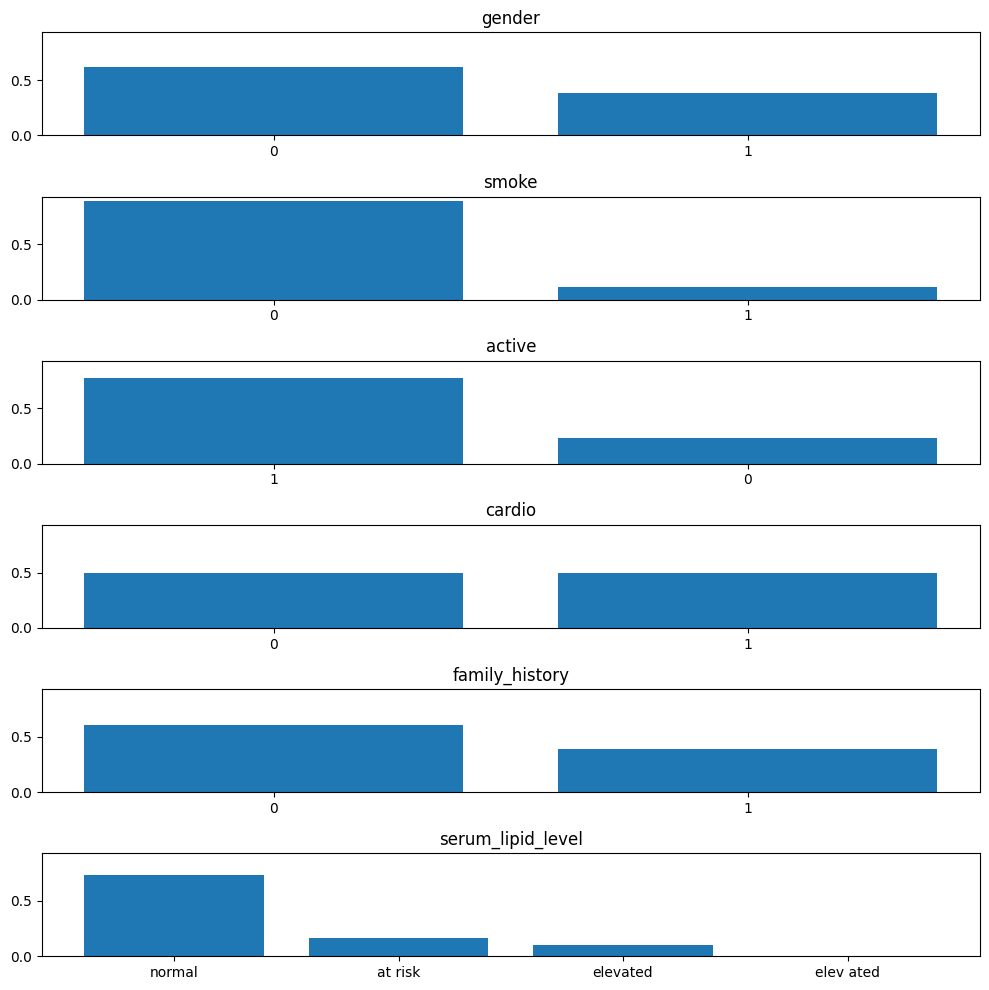

In [41]:
# --- Your code for 4a) here --- #

# 2.x Take the binary and or categorical features and plot barplots for each of them to subplots
# using matplotlib, subset them and plot using matplotlib.
# Use fractions!  Tip: value_counts(normalize = True)

fig, axes = plt.subplots(6, figsize = (10,10), sharex = False, sharey = True)
for i, fname in enumerate(binary_features + categorical_features):

    if(data[fname].dtype == ('boolean')):
        value_counts = data[fname].astype('int').value_counts(normalize = True).values
        f_levels = data[fname].astype('int').value_counts().index.values
        f_levels = [f"{level}" for level in f_levels] #cast to string for matplotlib

    #Get the normalized value counts
    else:
        value_counts = data[fname].value_counts(normalize = True).values
        f_levels = data[fname].value_counts().index.values
    #Get the levels of the current feature for the x-axis labels

    axes[i].bar(x = f_levels, height = value_counts)
    axes[i].set_title(fname)
    axes[i].set_xticks(f_levels) #for some reason matplotlib makes too many axis ticks.
plt.tight_layout()

**4 b)**

Do you see something odd with one of the features? Fix it.

_If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

In [42]:
### In 4b) you were supposed to delete the category.
# Fixing the value to be 'elevated' was a good choice because in this case it is probable its a typo.

data.loc[data['serum_lipid_level'] == 'elev ated', ['serum_lipid_level']] = 'elevated'
data['serum_lipid_level'] = data['serum_lipid_level'].cat.remove_categories("elev ated")

-------------

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.

--------------

**BMI**, or **Body Mass Index**, is a simple numerical measure that is commonly used to assess an individual's body weight in relation to their height. In our use case, BMI can be a useful indicator in the prediction of cardiovascular problems, as it could provide a well-established link between obesity and an increased risk of developing the disease.

\begin{align*}
\text{BMI} & = \frac{\text{Body mass (kg)}}{(\text{height (m)})^2} \\
\end{align*}

---------------------------------------
***5 a)*** Generate a new feature based off of the provided formula, using 'height' and 'body_mass' and name it **BMI**

_tip: In the case of our dataset the height is in centimeters, so make sure to convert it into meters_

In [43]:
### Your code for 5 a) here ###
data['BMI'] = data['body_mass'] / ((data['height'] / 100) ** 2)

***5 b)*** Using the previously calculated feature **BMI** generate a new feature named **BMI_category** that categorizes the values into groups, according to the standard BMI categories :

- Underweight: BMI less than 18.5
- Normal Weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or greater

In [44]:
### Your code for 5 b) here ###

#There are many ways how this question can be solved
#One way is to define a function that will mao the BMI values to the desired categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

#Apply the defined function to BMI column
data['BMI_category'] = data['BMI'].apply(categorize_bmi)

Now that we have our BMI values, it's a good practice to see if we can spot a hidden trend in our data.

***5 c)*** Create a countplot to visualize the distribution of cardio (target variable)  within different BMI categories.

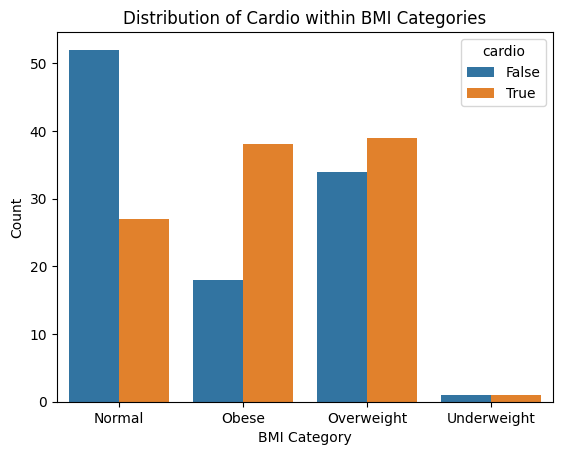

In [45]:
### Your code for 5 c) here ###
sns.countplot(data=data, x='BMI_category', hue='cardio')

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of Cardio within BMI Categories')
plt.show()

***5 d)*** Can you notice any relationship or visible trend?

**<font color="green">On answers for 5 d) </font>**


In this part showing that you were able to understand and interpret the plot to draw some conclusions is the most important thing. In this particular case, the plot highlights a positive relationship between BMI and the presence of cardiovascular disease. However, it's important to note that in practical scenarios, this relationship serves only as an initial indicator, and it is crutial to conduct statistical tests in order to validate these observations before making definitive conclusions.

Below, there is ready-made code for you to appropriatly add the newly created features to the right column type list. You don't need to change anything about the code, just make sure that the names of the added features are as specified earlier (**BMI** and **BMI_category**)

In [46]:
# ---- Add features to column type list (no need to change) --------
numeric_features.append("BMI")
data['BMI_category'] = data['BMI_category'].astype('category')
categorical_features.append("BMI_category")

-------------

## 6. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations.

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both.

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [47]:
# --- Your code for 6a) here --- #
# use the variable name data_min_maxed

data_min_maxed = data[numeric_features] #subset numeric features
data_min_maxed = pd.DataFrame(minmax_scale(data_min_maxed), columns = numeric_features) #rewrap to pandas dataframe

**6 b)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [48]:
# Your code for 6b here --- #

data_standardized = data[numeric_features]
data_standardized = pd.DataFrame(scale(data_standardized), columns = numeric_features) #rewrap to pandas dataframe

**6 c)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help.

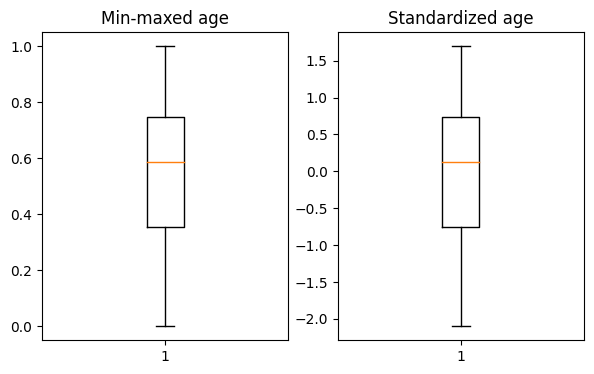

In [49]:
# Your code for 6c) here --- #

data_series = [data_min_maxed.age, data_standardized.age]
titles = ["Min-maxed age", "Standardized age"]
fig, axes = plt.subplots(1,2, figsize = (7, 4))

def boxplots_side_by_side(data_series, titles, axes): #its good practice to wrap in a f if you reuse it
    for i, d in enumerate(data_series):
        axes[i].boxplot(d)
        axes[i].set_title(titles[i])

boxplots_side_by_side(data_series,titles,axes)

**6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?

tip: Consider factors like the location of the mean, and the range of values presented.


**<font color="green">On answers for 6 d) </font>**

Here, good answers demonstrated an understanding of how boxplots aid in observing key features in both the min-max scaled and standardized data. They correctly identified that in the min-max scaled data, the minimum and maximum values align with 0 and 1, respectively. Additionally, in the standardized data, noticing that the mean is close to 0 demonstrates a good understanding of the scaling process.

This detailed observation not only indicates a thorough analysis of the boxplot but also validates the accuracy of the scaling methods.


---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it.

--------------------

***6e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [50]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [51]:
age_w_outlier

0      19797
1      22571
2      16621
3      16688
4      19498
       ...  
205    16630
206    16742
207    23117
208    15236
209      150
Name: age, Length: 210, dtype: int64

In [52]:
# --- Your code for 6e) ---

# make the age_w_outlier_minmaxed
age_w_outlier_minmaxed = minmax_scale(age_w_outlier)

# make the age_w_outlier_standardized
age_w_outlier_standardized = scale(age_w_outlier)

***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

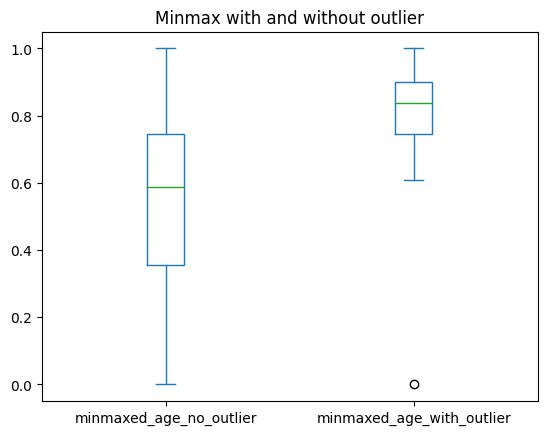

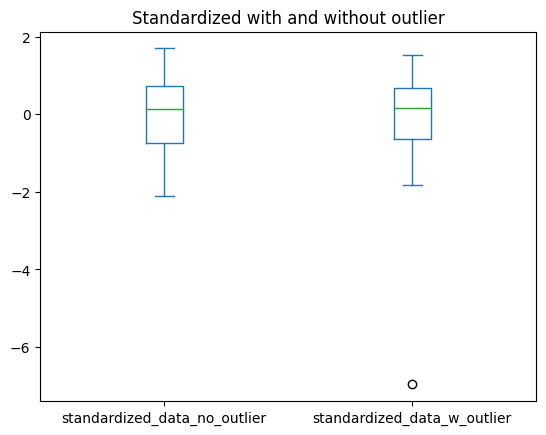

In [53]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age,
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age,
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**6 f) Look at the output of the above cell and answer the following**:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?


**<font color = green > Example of possible answer: </font>**


*1)*  Min-max normalization is affected much more by the outlier than the standardization is. The minmax box and shift of the distributions central statistics are greater when the outlier is added. In the ideal case one should now what the real min and max values are for the phenomenon the data depicts, although this is not always possible.

*2)*  The z-standardization to 0 mean and unit variance is more robust to outliers. Min-max scaling forces the relative distances between the points to be similar in the new representation, whereas standardization by definition tries to keep the mean at 0 and the new z-standardized values of the points are relative to the mean of the distribution (mean is subtracted and the result is divided with standard deviation).

**Comment by assistant:**

This could be of importance for example in a situation, where you have different samples, coming from the same population and you are going to compare them. Imagine you min-max each separately and one of the samples, (although representing the same population distribution) has an outlier. Now the distribution will be shifted by min-maxing and central-tendency based tests may give you the result that the group's mean is larger when in truth this can be just because of how the data was preprocessed.  

---------------
## 7. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other.

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'cholesterol' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


**7 a)** One-hot-encode the serum_lipid_level-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe.

_tip: pandas has a function for this, google!_

In [54]:
# --- Your code for 7 a) here ---
one_hotted_data = pd.get_dummies(data.serum_lipid_level, prefix = "serum_lipid_level")

# Save one-hotted features names in a vector
one_hotted_features = one_hotted_data.columns.values

data = pd.concat([data, one_hotted_data], axis = 1)

# Print the head of your new dataframe with the one-hot encoded values
data.head(n=5)

,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,serum_lipid_level,family_history,BMI,BMI_category,serum_lipid_level_at risk,serum_lipid_level_elevated,serum_lipid_level_normal
0,19797,False,161,55,102,68,False,True,False,elevated,False,21.218317,Normal,0,1,0
1,22571,True,178,68,120,70,False,False,False,normal,False,21.461937,Normal,0,0,1
2,16621,True,169,69,120,80,False,True,False,normal,False,24.158818,Normal,0,0,1
3,16688,False,156,77,120,80,False,True,False,normal,False,31.640368,Obese,0,0,1
4,19498,True,170,98,130,80,True,True,True,elevated,False,33.910035,Obese,0,1,0


----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

<font color = green> In general a good answer for the bonus exercises showed that the student showed he/she understood the effect of the 'age' feature on the methods. Also, it was important to note, that for PCA this was because of variance and in t-SNE the distance calculation was affected by the data not being standardized. </font>

____________
##  <font color = dollargreen > 8. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

-------------
**8 a)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**.

In [55]:
### Your code here ###
pca_z = PCA(n_components = 2)
pca_no_z = PCA(n_components = 2)
pca_z_projection = pca_z.fit_transform(data_standardized)
pca_no_z_projection = pca_no_z.fit_transform(data[numeric_features])

-------------


**8 b) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation see tutorial. The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

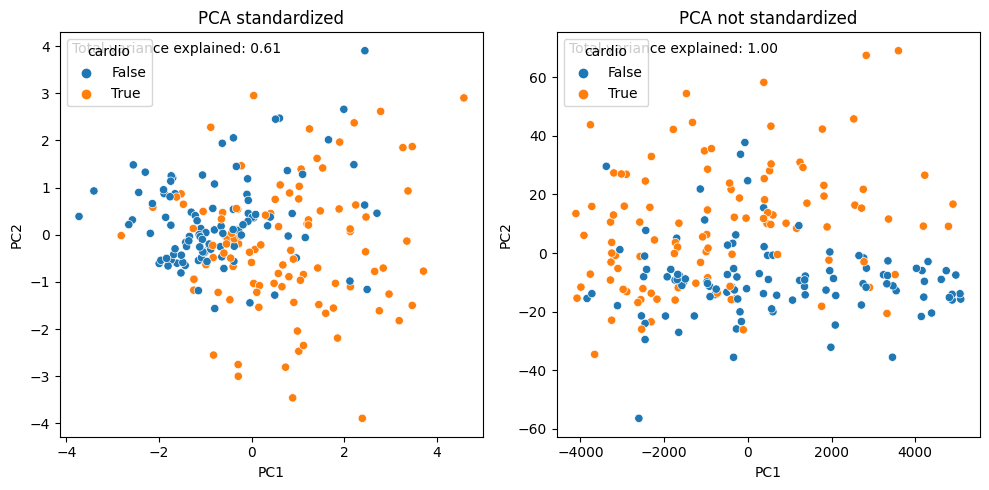

In [56]:
# --- Your code for 8b) --- you can make more cells if you like ---

# Get the explained variance ratios
var_ratio_no_z = pca_no_z.explained_variance_ratio_
var_ratio_with_z = pca_z.explained_variance_ratio_

# Get the necessary datas
datas = [pd.concat([pd.DataFrame(pca_z_projection, columns = ["PC1", "PC2"]), data['cardio']], axis = 1),
        pd.concat([pd.DataFrame(pca_no_z_projection, columns =  ["PC1", "PC2"] ), data['cardio']], axis = 1)]
variances = [f"{sum(var_ratio_with_z):.2f}", f"{sum(var_ratio_no_z):.2f}"]
titles = ["PCA standardized", "PCA not standardized"]

fig, axes = plt.subplots(1,2, figsize = (10, 5))

def scatter_with_title(data_x, data_y, title, cardio, axes):
    axes.scatter(x = data_x,  y = data_y, c = cardio, label = cardio)
    axes.set_title(title)
    axes.legend()
    return axes

for i, d in enumerate(datas):
    sns.scatterplot(x = d.PC1, y = d.PC2, hue = d.cardio, ax = axes[i])
    axes[i].set_title(titles[i])
    axes[i].annotate(xy  = (0.03, 0.95), text = f"Total variance explained: {variances[i]}", xycoords = 'axes fraction')
plt.tight_layout()




**8 c) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features

In [57]:
# --- Your code for 8c) here --- #

orig_data_numerics_std = data[numeric_features].describe().loc['std']
standardized_data_numerics_std = data_standardized[numeric_features].describe().loc['std']


print( "+++"*3, "Standard deviations of numeric features, original data", "+++" * 3)
print(orig_data_numerics_std)

print( "+++"*3, "Standard deviations of numeric features, standardized data", "+++" * 3)
print(standardized_data_numerics_std)


+++++++++ Standard deviations of numeric features, original data +++++++++
age                    2429.010199
body_mass                14.612326
height                    7.534648
blood_pressure_high      17.508947
blood_pressure_low        9.947652
BMI                       5.400075
Name: std, dtype: float64
+++++++++ Standard deviations of numeric features, standardized data +++++++++
age                    1.002389
body_mass              1.002389
height                 1.002389
blood_pressure_high    1.002389
blood_pressure_low     1.002389
BMI                    1.002389
Name: std, dtype: float64


----------
**8 d) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:**

1. Where do you think the difference between the amounts of explained variance might come from?

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

<font color = green> ***--- Example answer 8d) here ---***  </font>

The feature age dominates the variance in the non-standardized case. This inflated effect on is due to the range of the feature. Standardization helps with this by reducing the effect of the difference. The dominance of the age feature results in one of the components of PCA explaining close to 100% of the variance - this comes from that in comparison to the other features the age feature covers almost all variance in the data when unstandardized.

------------------

## <font color = dollargreen > 9. Bonus: t-SNE and high dimensional data </font>

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***9 a)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [58]:
# Gather the data needed
t_sne_data_standardized = pd.concat([data_standardized[numeric_features]], axis = 1)#data[binary_features], data[one_hotted_features]], axis = 1 )
t_sne_data_not_standardized = pd.concat([data[numeric_features]], axis = 1) #, data[one_hotted_features]], axis = 1 )
tsne_standardized = TSNE(n_components = 2)
tsne_not_standardized = TSNE(n_components = 2)

tsne_projection_standardized = tsne_standardized.fit_transform(t_sne_data_standardized)
tsne_projection_not_standardized = tsne_not_standardized.fit_transform(t_sne_data_not_standardized)

t_sne_data_standardized = pd.DataFrame(tsne_projection_standardized, columns = ["TSNE_Component_1", "TSNE_Component_2"])
t_sne_data_not_standardized = pd.DataFrame(tsne_projection_not_standardized, columns = ["TSNE_Component_1", "TSNE_Component_2"])

t_sne_datas = [t_sne_data_standardized, t_sne_data_not_standardized]

***9 b)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

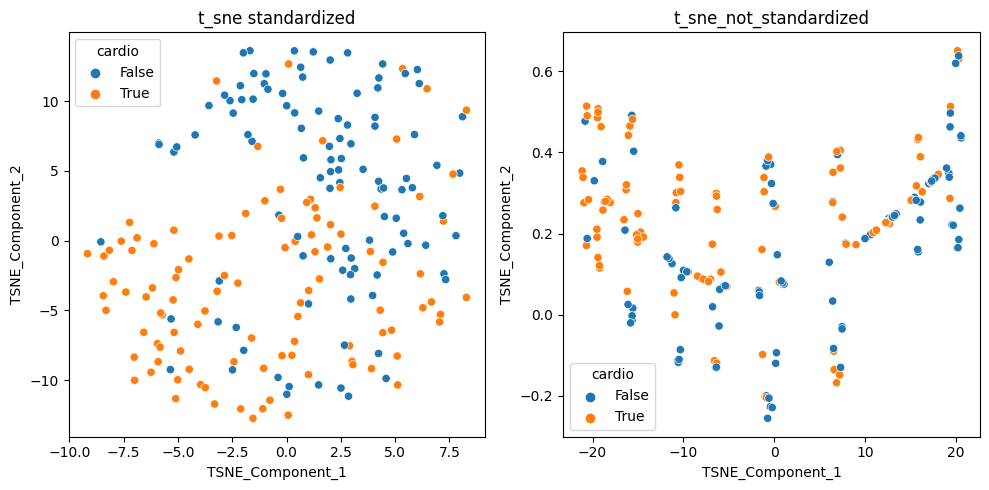

In [59]:
# --- Code for 9 b) --- #
fig, axes = plt.subplots(1,2, figsize = (10, 5))

titles = ["t_sne standardized", "t_sne_not_standardized"]
for i, d in enumerate(t_sne_datas):
    sns.scatterplot(x = d.TSNE_Component_1, y = d.TSNE_Component_2, ax = axes[i], hue = data.cardio)
    axes[i].set_title(titles[i])
    plt.tight_layout()


***9 c)***

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_

**<font color = green> ---Example answer for 9c)--- </font>**

- Here we come to a similar problem as with the PCA case but unlike in PCA the problem comes from the distance calculation. In other words, the age feature again dominates the t-SNE in the unstandardized case, but this time it is not because of variance but because of the calculation of **distance** between the points, measured by default in the t-SNE with euclidean distance. This means that whether two points are close to each other is mostly determined by the feature 'age'. The age feature causes the representation to become relatively one-dimensional.


- Good answers mentioned that the problem is due to the effect of the unstandardized feature on the **distance** calculation. Many answers still talked here about variance which was wrong. Some answers also said that t-sne is a multi-dimensional version of PCA which is not correct. It is a very different algorithm.


- Some very good answers also noted and discussed differences between t-SNE and PCA. Whereas in PCA data is "compressed" into a linear combination of the data t-SNE is non-linear and starts from a random initialization of the low-dimensional distribution. With PCA components, if you take enough of them you can revert back to the original data or atleast close to it, whereas with t-SNE this is not an option and the result of t-sne is one of many possible depictions of the original data (you can end up in very different solutions). PCA in this sense is "deterministic" and can be used as a preprocessing step whereas t-SNE is closer to a clustering algorithm more useful for graphing and using it as a preprocessing step for dimensionality reduction can result in loss of information in unexpected ways.  

- You can verify that t_sne is not deterministic by rerunning the cell and looking at what happens.